In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS students (
        student_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT,
        last_name TEXT
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS grades (
        grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
        student_id INTEGER,
        subject TEXT,
        grade INTEGER,
        FOREIGN KEY (student_id) REFERENCES students (student_id)
    )
''')

students = [
    ('John', 'Doe'),
    ('Jane', 'Smith'),
    ('Alice', 'Johnson'),
    ('Bob', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('''
    INSERT INTO students (first_name, last_name)
    VALUES (?, ?)
''', students)

# Insert data into the 'grades' table
grades = [
    (1, 'Math', 85),
    (1, 'Physics', 90),
    (1, 'Chemistry', 88),
    (2, 'Math', 92),
    (2, 'Physics', 87),
    (2, 'Chemistry', 91),
    (3, 'Math', 78),
    (3, 'Physics', 83),
    (3, 'Chemistry', 80),
    (4, 'Math', 88),
    (4, 'Physics', 85),
    (4, 'Chemistry', 87),
    (5, 'Math', 95),
    (5, 'Physics', 92),
    (5, 'Chemistry', 94)
]

cursor.executemany('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (?, ?, ?)
''', grades)



connection.commit()


In [8]:
#query 1
cursor.execute('''SELECT students.first_name, students.last_name, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id''')

studentgrade = cursor.fetchall()
print(f"Students and grades: {studentgrade}")

Students and grades: [('John', 'Doe', 85), ('John', 'Doe', 90), ('John', 'Doe', 88), ('Jane', 'Smith', 92), ('Jane', 'Smith', 87), ('Jane', 'Smith', 91), ('Alice', 'Johnson', 78), ('Alice', 'Johnson', 83), ('Alice', 'Johnson', 80), ('Bob', 'Brown', 88), ('Bob', 'Brown', 85), ('Bob', 'Brown', 87), ('Eve', 'Davis', 95), ('Eve', 'Davis', 92), ('Eve', 'Davis', 94), ('John', 'Doe', 85), ('John', 'Doe', 90), ('John', 'Doe', 88), ('Jane', 'Smith', 92), ('Jane', 'Smith', 87), ('Jane', 'Smith', 91), ('Alice', 'Johnson', 78), ('Alice', 'Johnson', 83), ('Alice', 'Johnson', 80), ('Bob', 'Brown', 88), ('Bob', 'Brown', 85), ('Bob', 'Brown', 87), ('Eve', 'Davis', 95), ('Eve', 'Davis', 92), ('Eve', 'Davis', 94), ('John', 'Doe', 85), ('John', 'Doe', 90), ('John', 'Doe', 88), ('Jane', 'Smith', 92), ('Jane', 'Smith', 87), ('Jane', 'Smith', 91), ('Alice', 'Johnson', 78), ('Alice', 'Johnson', 83), ('Alice', 'Johnson', 80), ('Bob', 'Brown', 88), ('Bob', 'Brown', 85), ('Bob', 'Brown', 87), ('Eve', 'Davis', 9

In [9]:
#query 2
cursor.execute('''SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id''')

avggrade = cursor.fetchall()

print(f"Average grade per student: {avggrade}")

Average grade per student: [('John', 'Doe', 87.66666666666667), ('Jane', 'Smith', 90.0), ('Alice', 'Johnson', 80.33333333333333), ('Bob', 'Brown', 86.66666666666667), ('Eve', 'Davis', 93.66666666666667)]


In [ ]:
# query 3
cursor.execute('''SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY average_grade DESC
LIMIT 1 ''')

highstudent = cursor.fetchall()

print(f"Highest Average Grade Student: {highstudent}")

In [12]:
#query 4
cursor.execute('''SELECT AVG(grades.grade) AS average_math_grade
FROM grades
WHERE grades.subject = 'Math' ''')

avgmath = cursor.fetchall()

print(f"Average grade for Math: {avgmath}")

Average grade for Math: [(87.6,)]


In [13]:
#query 5
cursor.execute('''SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90''')

above90 = cursor.fetchall()

print(f"Students who scored above 90 in any subject: {above90} ")

Students who scored above 90 in any subject: [('Jane', 'Smith', 'Mathematics', 92), ('Jane', 'Smith', 'Chemistry', 91), ('Eve', 'Davis', 'Mathematics', 95), ('Eve', 'Davis', 'Physics', 92), ('Eve', 'Davis', 'Chemistry', 94), ('Jane', 'Smith', 'Mathematics', 92), ('Jane', 'Smith', 'Chemistry', 91), ('Eve', 'Davis', 'Mathematics', 95), ('Eve', 'Davis', 'Physics', 92), ('Eve', 'Davis', 'Chemistry', 94), ('Jane', 'Smith', 'Mathematics', 92), ('Jane', 'Smith', 'Chemistry', 91), ('Eve', 'Davis', 'Mathematics', 95), ('Eve', 'Davis', 'Physics', 92), ('Eve', 'Davis', 'Chemistry', 94), ('Jane', 'Smith', 'Mathematics', 92), ('Jane', 'Smith', 'Chemistry', 91), ('Eve', 'Davis', 'Mathematics', 95), ('Eve', 'Davis', 'Physics', 92), ('Eve', 'Davis', 'Chemistry', 94), ('Jane', 'Smith', 'Math', 92), ('Jane', 'Smith', 'Chemistry', 91), ('Eve', 'Davis', 'Math', 95), ('Eve', 'Davis', 'Physics', 92), ('Eve', 'Davis', 'Chemistry', 94)] 


In [14]:
students_df = pd.read_sql_query('SELECT * FROM students', connection)
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)


In [16]:
cursor.execute('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
''')

data = cursor.fetchall()
columns = ['first_name', 'last_name', 'subject', 'grade']
df = pd.DataFrame(data, columns=columns)


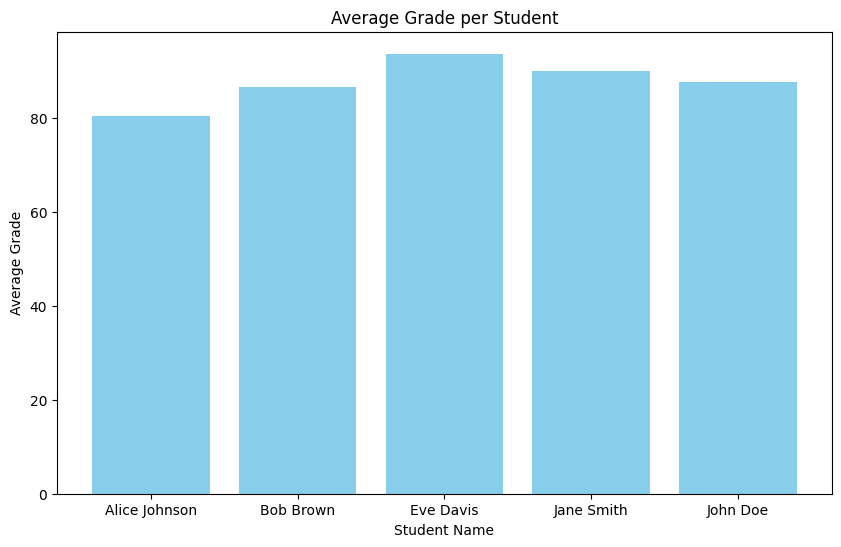

In [21]:
import matplotlib.pyplot as plt

avg_grades_per_student = df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()
avg_grades_per_student['full_name'] = avg_grades_per_student['first_name'] + ' ' + avg_grades_per_student['last_name']
plt.figure(figsize=(10, 6))
plt.bar(avg_grades_per_student['full_name'], avg_grades_per_student['grade'], color='skyblue')
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grade per Student')
plt.show()

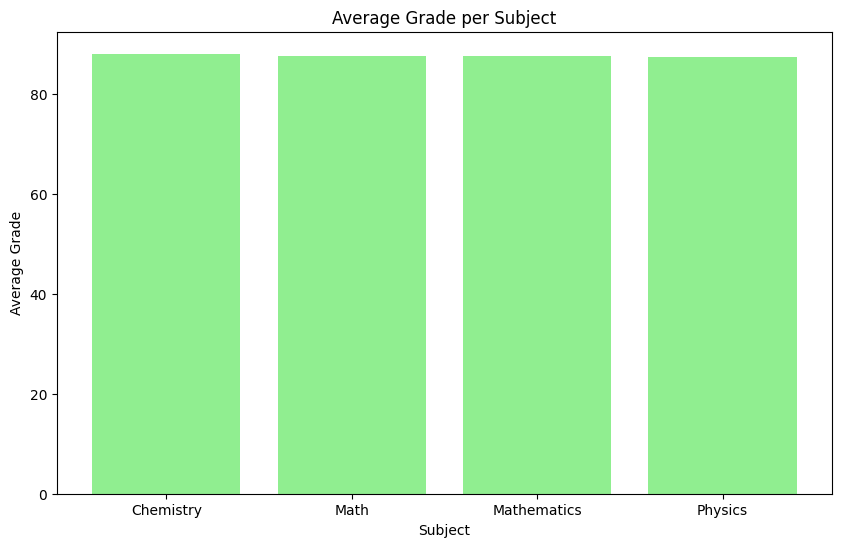

In [22]:
avg_grades_per_subject = df.groupby('subject')['grade'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avg_grades_per_subject['subject'], avg_grades_per_subject['grade'], color='lightgreen')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade per Subject')
plt.show()

connection.close()